In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns

In [2]:
forestfires = pd.read_csv("C:/Users/Anusha/Desktop/ExcelRProjects/dataset/forestfires.csv")

In [3]:
forestfires.head(5)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


### Perform Initial EDA

In [4]:
forestfires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [5]:
### month and day variables are already existing, drop the one hot encoded values as they are creating large no. variables
##Dropping the one hot encoded  month and day columns
forestfires.drop(["monthapr","monthaug","monthdec","monthfeb","monthjan","monthjul","monthjun","monthmar","monthmay","monthnov","monthoct","monthsep","dayfri","daymon","daysat","daysun","daythu","daytue","daywed"],axis=1,inplace =True)

In [6]:
forestfires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  size_category  517 non-null    object 
dtypes: float64(8), int64(1), object(3)
memory usage: 48.6+ KB


In [7]:
forestfires[forestfires.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,0.00,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,0.00,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,28.66,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,0.00,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,0.00,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,0.00,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,0.00,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,0.00,small


In [8]:
### There are 8 duplicated rows Identified,drop the records
forestfires=forestfires.drop_duplicates()

In [9]:
forestfires[forestfires.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category


### Visualizations

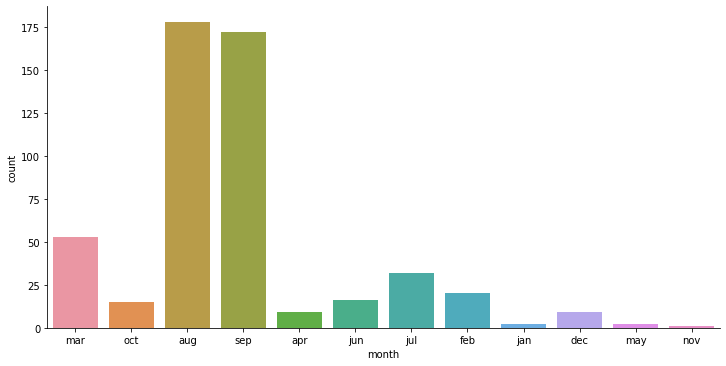

In [10]:
#use seaborn to plot the count of each 12 months
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")
sns.factorplot('month', data=forestfires, kind="count",size = 5,aspect = 2)

###### Most of the fires have taken place in aug and sep months

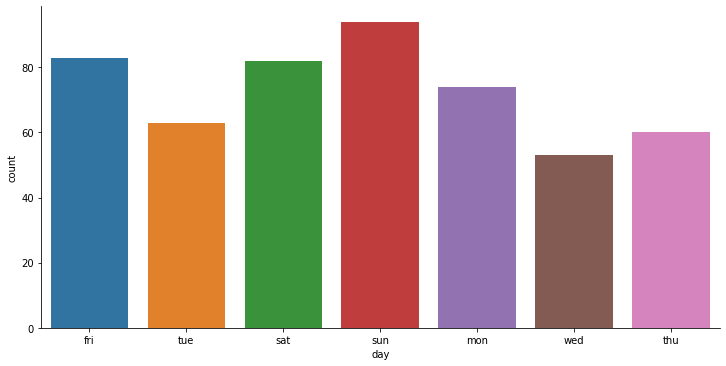

In [11]:
sns.factorplot('day', data=forestfires, kind="count",size = 5,aspect = 2)

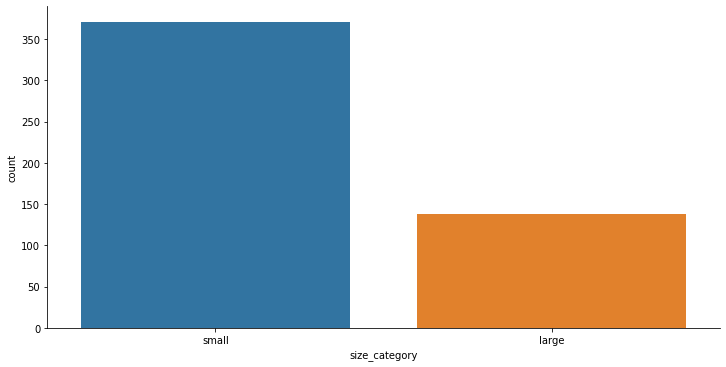

In [12]:
sns.factorplot('size_category', data=forestfires, kind="count",size = 5,aspect = 2)

###### forset fires mostly occured are small in size

<AxesSubplot:xlabel='day', ylabel='month'>

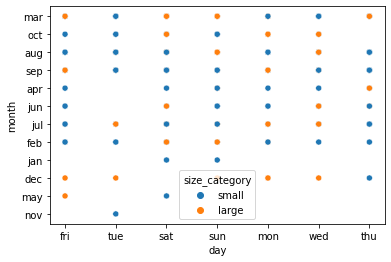

In [13]:
sns.scatterplot(forestfires['day'],forestfires['month'],hue=forestfires['size_category'])

###### most of the forest fires occured in fridays and large size forest fires mostly occured in march and december months

In [14]:
forestfires.size_category.unique()

array(['small', 'large'], dtype=object)

In [15]:
##As, the model cannot be applied directly on object data we need to encode this object variables
def encode_labels(dataset):
    from sklearn import preprocessing 
    le = preprocessing.LabelEncoder()
    for column_name in dataset.columns:
        if dataset[column_name].dtype == object:
            dataset[column_name] = le.fit_transform(dataset[column_name])
        else:
            pass

In [16]:
encode_labels(forestfires)

In [17]:
forestfires.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,1
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,1
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,1


#### 0 - Indicates large size forest fires and 1 includes smal size

<AxesSubplot:>

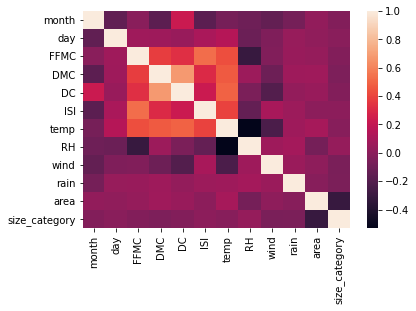

In [18]:
cor = forestfires.corr()
sns.heatmap(cor)

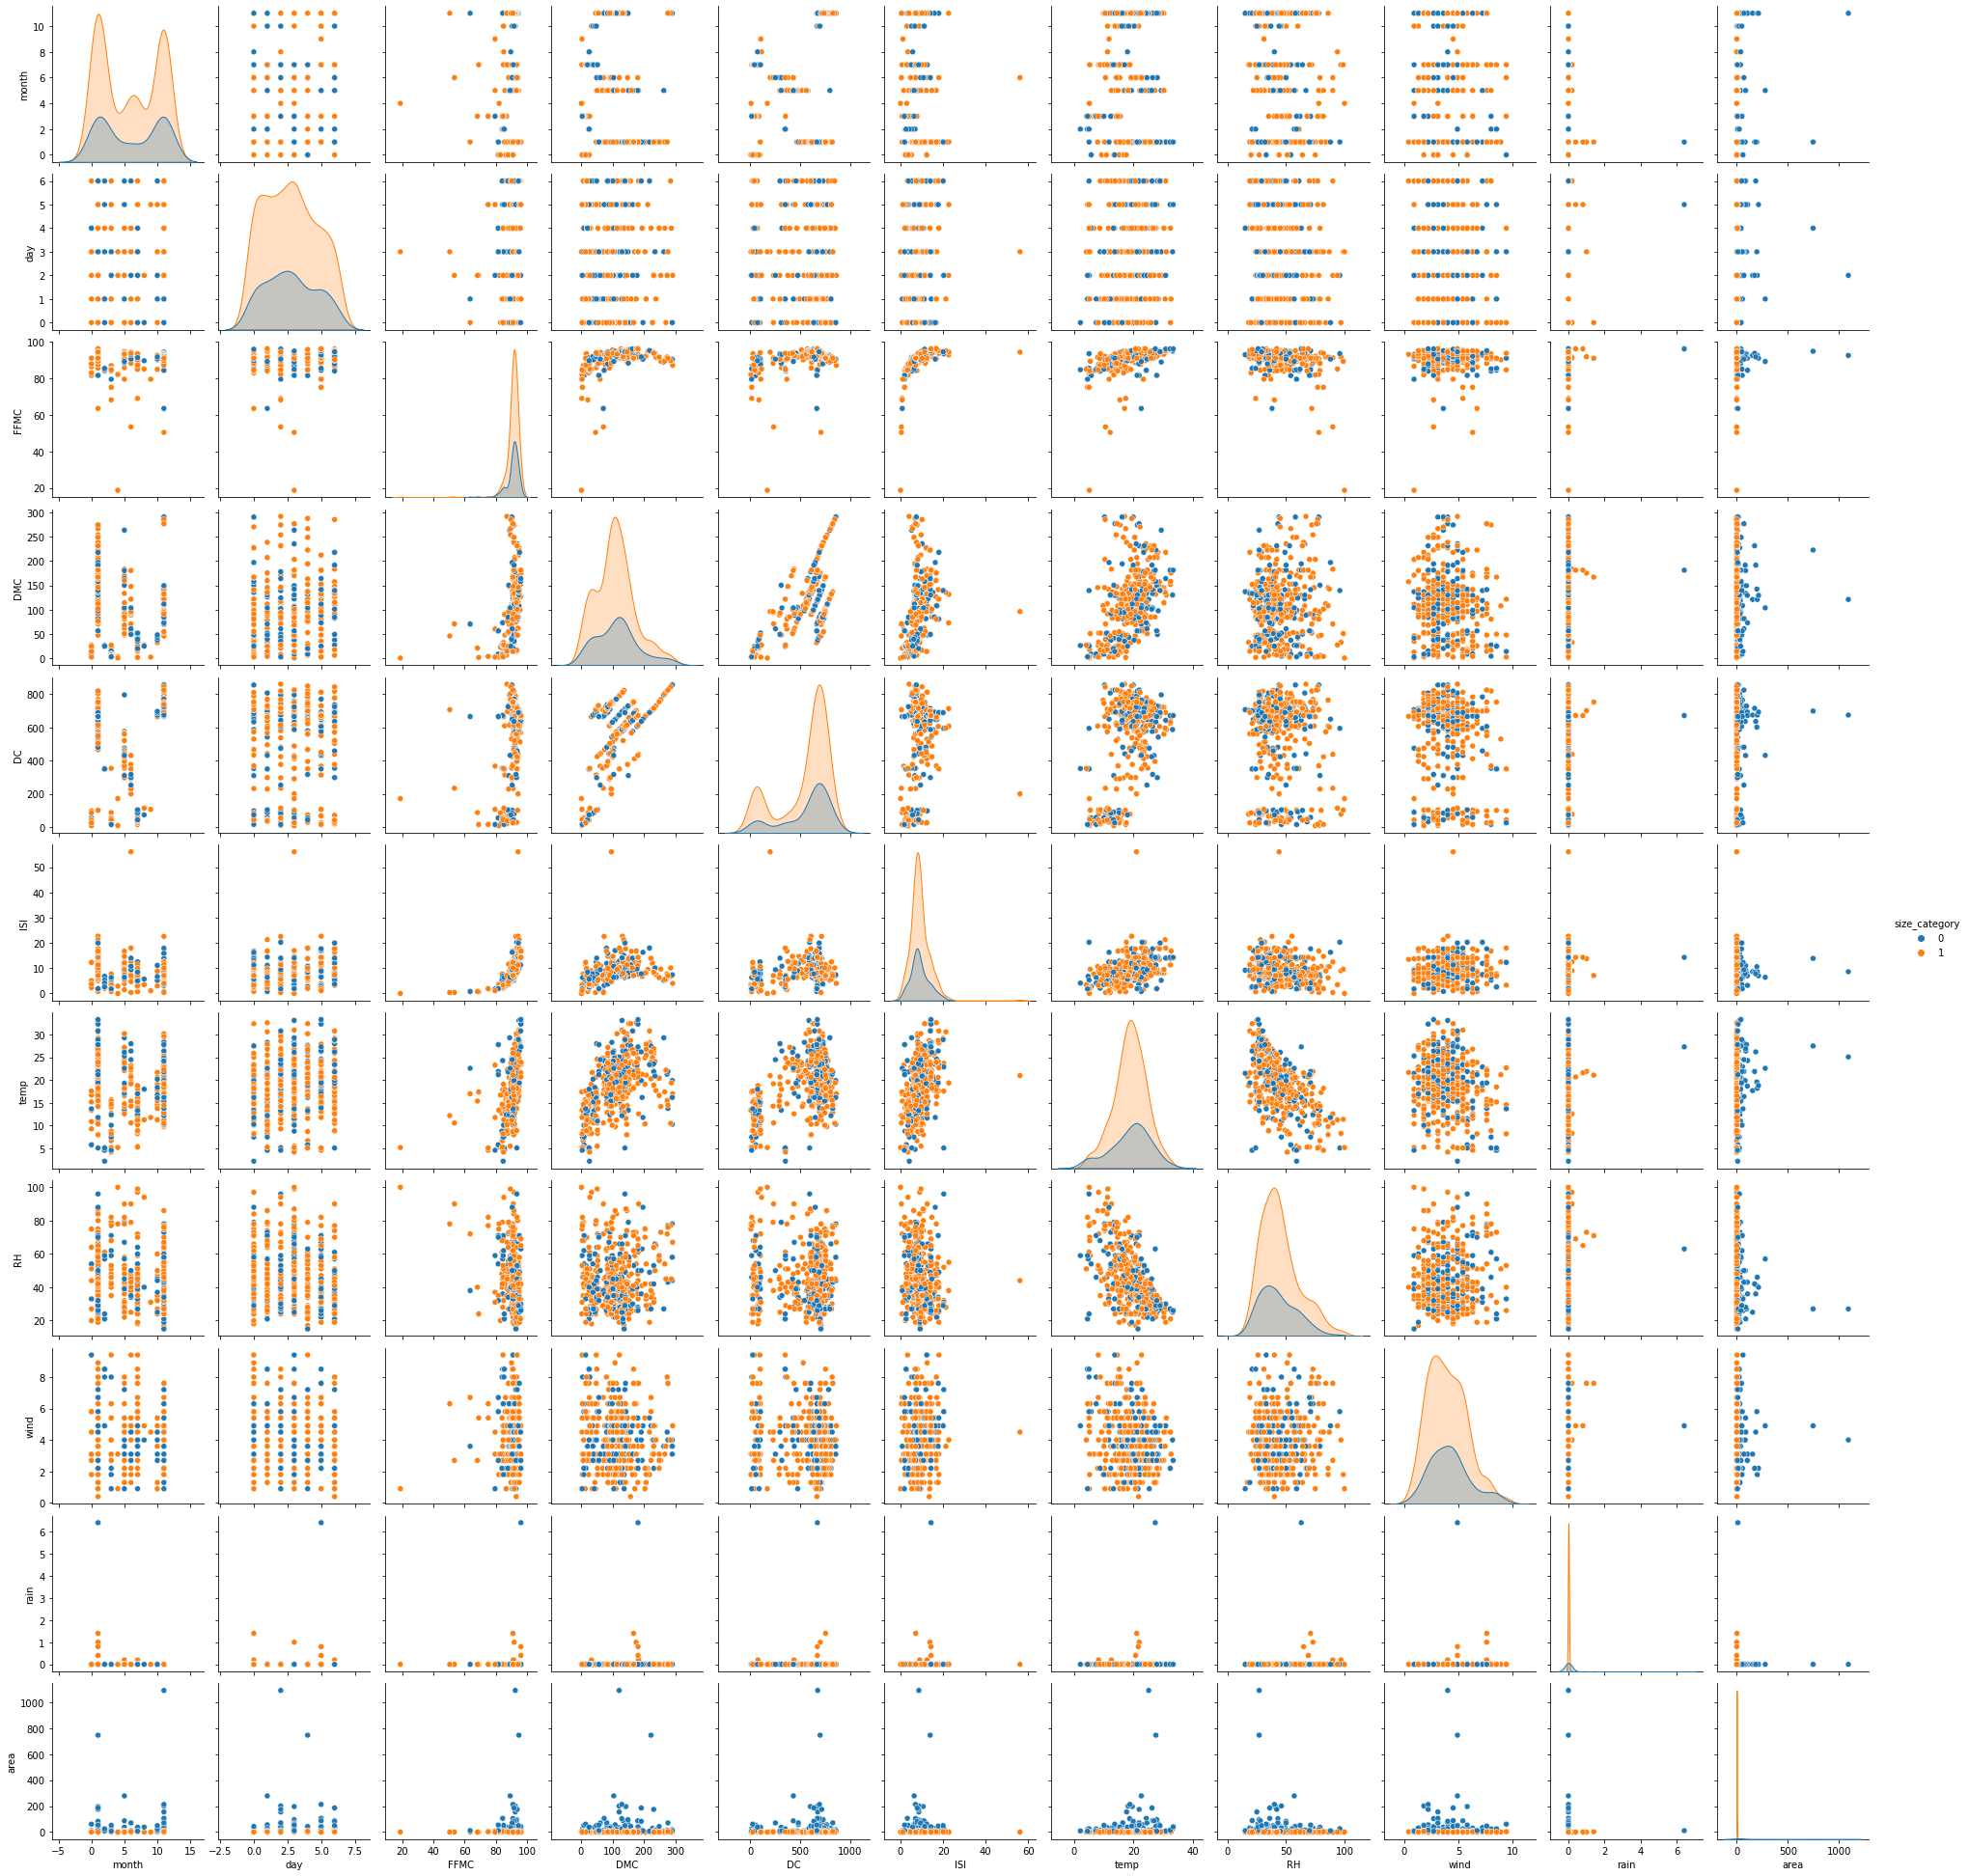

In [19]:
#pairwise plot of all the features
import warnings 
warnings.filterwarnings("ignore")
sns.pairplot(forestfires,hue='size_category')
plt.show()

### Feature Scaling

###### Normalising the data as there is scale difference

In [45]:
predictors = forestfires.iloc[:,0:11]
target = forestfires.iloc[:,11]

In [46]:
def norm_func(i):
    x= (i-i.min())/(i.max()-i.min())
    return (x)

In [47]:
### We should normalize Input variables 
fires=norm_func(predictors)
fires

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,0.636364,0.000000,0.870968,0.086492,0.101325,0.090909,0.192926,0.423529,0.700000,0.00000,0.000000
1,0.909091,0.833333,0.927742,0.118194,0.775419,0.119430,0.508039,0.211765,0.055556,0.00000,0.000000
2,0.909091,0.333333,0.927742,0.146795,0.796294,0.119430,0.398714,0.211765,0.100000,0.00000,0.000000
3,0.636364,0.000000,0.941935,0.110958,0.081623,0.160428,0.196141,0.964706,0.400000,0.03125,0.000000
4,0.636364,0.500000,0.910968,0.172984,0.110590,0.171123,0.295820,0.988235,0.155556,0.00000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
512,0.090909,0.500000,0.811613,0.191592,0.771315,0.033868,0.823151,0.200000,0.255556,0.00000,0.005904
513,0.090909,0.500000,0.811613,0.191592,0.771315,0.033868,0.633441,0.658824,0.600000,0.00000,0.049769
514,0.090909,0.500000,0.811613,0.191592,0.771315,0.033868,0.610932,0.647059,0.700000,0.00000,0.010231
515,0.090909,0.333333,0.976774,0.499311,0.711622,0.201426,0.752412,0.317647,0.400000,0.00000,0.000000


In [48]:
X = fires.values
Y = target.values

##### Building the model using Support Vector Machines(SVM)

In [49]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [50]:
x_train,x_test,y_train,y_test  = train_test_split(X,Y, test_size = 0.25)

In [51]:
## Kernal linear
model_linear = SVC(kernel = "linear")
model_linear.fit(x_train,y_train)

SVC(kernel='linear')

In [52]:
pred_test_linear = model_linear.predict(x_test)

In [53]:
np.mean(pred_test_linear==y_test)

0.7265625

In [54]:
# Kernel = poly
model_poly = SVC(kernel = "poly")
model_poly.fit(x_train,y_train)
pred_test_poly = model_poly.predict(x_test)

In [55]:
np.mean(pred_test_poly==y_test) 

0.75

In [56]:
# kernel = rbf
model_rbf = SVC(kernel = "rbf")
model_rbf.fit(x_train,y_train)
pred_test_rbf = model_rbf.predict(x_test)

In [57]:
np.mean(pred_test_rbf==y_test)

0.7265625

In [58]:
#'sigmoid'
model_sig = SVC(kernel = "sigmoid")
model_sig.fit(x_train,y_train)
pred_test_sig = model_rbf.predict(x_test)

In [59]:
np.mean(pred_test_sig==y_test)

0.7265625

### from the above models we can conclude model with kernal = linear is giving best accuracy

In [60]:
## finding the best c and gamma values using gridsearch cv
from sklearn.model_selection import GridSearchCV
clf = SVC()
param_grid = [{'kernel':['linear'],'gamma':[50,5,10,0.5],'C':[15,14,13,12,11,10,0.1,0.001] }]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12, 11, 10, 0.1, 0.001],
                          'gamma': [50, 5, 10, 0.5], 'kernel': ['linear']}])

In [61]:
gsv.best_params_ , gsv.best_score_ 

({'C': 15, 'gamma': 50, 'kernel': 'linear'}, 0.7927800269905533)

In [62]:
## finding the best c and gamma values using gridsearch cv
from sklearn.model_selection import GridSearchCV
clf = SVC()
param_grid = [{'kernel':['rbf'],'gamma':[50,5,10,0.5],'C':[15,14,13,12,11,10,0.1,0.001] }]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12, 11, 10, 0.1, 0.001],
                          'gamma': [50, 5, 10, 0.5], 'kernel': ['rbf']}])

In [63]:
gsv.best_params_ , gsv.best_score_ 

({'C': 15, 'gamma': 0.5, 'kernel': 'rbf'}, 0.7690958164642375)

#### Final model building using kernal = linear, c = 15,gamma = 50

In [66]:
## Kernal linear
model_linear = SVC(kernel = "linear",C=15, gamma= 50)
model_linear.fit(x_train,y_train)

SVC(C=15, gamma=50, kernel='linear')

In [67]:
pred_test_linear = model_linear.predict(x_test)

In [68]:
np.mean(pred_test_linear==y_test)

0.7578125

###### Conclusion: It can be considered as a good model for predicting forest fires as the model accuracy is greater than 75% for more accuracy we can perform other models like decision trees,random forest etc
